# IEEE 30 - Otimização Por Método de Pontos Interiores

Neste relatório, foi implementado o Método de Pontos Interiores através do pacote de Otimização GEKKO, utilizando-se o solver IPOPT. 

## IEEE 30:

- Caso de Estudo 1: Realiza o cálculo supondo que todas as variáveis são contínuas (solução não-factível);

- Caso de Estudo 2: Realiza o cálculo supondo que todas as variáveis são contínuas e, ao final da solução, as variáveis discretas são arredondadas para o valor mais próximo do conjunto discreto permitido (factível);

- Caso de Estudo 3: Realiza o cálculo com solver APOPT, considerando o problema como sendo MINLP;

As funções desenvolvidas para lidar com os dados e com a formulação matemática do problema foram importadas do arquivo msc_rafael_pavan.py, de modo a deixar o relatório mais consciso.

In [1]:
# Importa packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandapower as pp
import time
import random
from pandapower.networks import case14, case_ieee30, case118, case300, case4gs
import tabulate
import numba
from numba import njit
from gekko import GEKKO
from pandapower.plotting.plotly import pf_res_plotly
import pandapower.plotting as pplot
plt.style.use('fivethirtyeight')

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
font = {'size'   : 15}
plt.rc('font', **font)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
# Importa funções desenvolvidas

from msc_rafael_pavan import inicializa_sep
from msc_rafael_pavan import matriz_condutancia
from msc_rafael_pavan import coleta_dados_vbus
from msc_rafael_pavan import coleta_dados_gen
from msc_rafael_pavan import func_objetivo
from msc_rafael_pavan import pen_tensao
from msc_rafael_pavan import pen_ger_reativo
from msc_rafael_pavan import coleta_dados_trafo
from msc_rafael_pavan import pen_trafo
from msc_rafael_pavan import coleta_dados_bshunt
from msc_rafael_pavan import converte_trafo
from msc_rafael_pavan import cria_alcateia
from msc_rafael_pavan import cria_enxame
from msc_rafael_pavan import pen_bshunt
from msc_rafael_pavan import fluxo_de_pot
from msc_rafael_pavan import fitness
from msc_rafael_pavan import validacao
from msc_rafael_pavan import otimizacao_gwo_continuo
from msc_rafael_pavan import otimizacao_pso_continuo
from msc_rafael_pavan import discreto_bshunt
from msc_rafael_pavan import discreto_tap
from msc_rafael_pavan import otimizacao_gwo_discreto
from msc_rafael_pavan import otimizacao_pso_discreto
from msc_rafael_pavan import otimizacao_clpso_discreto
from msc_rafael_pavan import ipm_ieee30
from msc_rafael_pavan import ipm_ieee14

In [2]:
sep118 = case118()

from msc_rafael_pavan import validacao_q


init = inicializa_sep(sep118,'nr')

In [33]:
fitness = np.zeros((50,250))
perdas = np.zeros((50,250))
penaltygen = np.zeros((50,250))
penaltyv = np.zeros((50,250))
tempos = np.zeros((50,250))
solutions = np.zeros((50,83))

for i in range(50):
    
    j,perdas_,pen_v,pen_gq,pen_tap,pen_bsh,global_best, tempo = otimizacao_clpso_discreto(sep118, pt=0.7, rgap =0, zeta=0.01, psi=0.05, sigma=0.01, omega=0.01, max_iter=250, n_particles=40,c1=1,c2=0,v_amp=0.1,valor_inicial=0,step=0.01, wmax=0.9,relatorio=False,inicial=False)
    
    solutions[i,:] = global_best
    
    fitness[i,:] = j
    
    perdas[i,:] = perdas_
    
    penaltygen[i,:] = pen_gq
    
    penaltyv[i,:] = pen_v
    
    tempos[i,:] = tempo
    
    print(i)
    
    if i == 49:
        
        print('acabou')
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
acabou


In [34]:
pd.DataFrame(fitness).to_csv('fithj')
pd.DataFrame(perdas).to_csv('perdashj')
pd.DataFrame(penaltygen).to_csv('penghj')
pd.DataFrame(penaltyv).to_csv('penvhj')
pd.DataFrame(tempos).to_csv('timeshj')
pd.DataFrame(solutions).to_csv('solutionshj')


 
Melhor Global da Iteração: 0
Perdas (pu): 1.7896698522152947
Penalização de Tensão: 0.017032130003243662
Penalização de Geração de Reativo: 31.01655065452681
Fitness: 2.1168674887638064
Tempo:  1.2076125144958496
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 1
Perdas (pu): 1.78567659019371
Penalização de Tensão: 0.0001388087883252842
Penalização de Geração de Reativo: 29.59243485055178
Fitness: 2.081739747487553
Tempo:  1.2084767818450928
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 2
Perdas (pu): 1.5869068852935366
Penalização de Tensão: 0.025114725392968218
Penalização de Geração de Reativo: 26.656427250572513
Fitness: 1.87858588319223
Tempo:  1.179408311843872
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 3
Perdas (pu): 1.4893201387806434
Penalização de Tensão: 0.01751066974597615
Penalização de Geração de Reativo: 21.92

 
Melhor Global da Iteração: 30
Perdas (pu): 1.243899695139314
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 3.1843378717792747
Fitness: 1.2757430738571067
Tempo:  1.158949375152588
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 31
Perdas (pu): 1.243899695139314
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 3.1843378717792747
Fitness: 1.2757430738571067
Tempo:  1.1695852279663086
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 32
Perdas (pu): 1.243899695139314
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 3.1843378717792747
Fitness: 1.2757430738571067
Tempo:  1.1593828201293945
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 33
Perdas (pu): 1.243899695139314
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 3.1843378717792747
Fitness: 1.2757430738571067
Tempo:  1.165989160

 
Melhor Global da Iteração: 61
Perdas (pu): 1.2264379379732937
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 1.8998254195722526
Fitness: 1.2454361921690162
Tempo:  1.1657896041870117
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 62
Perdas (pu): 1.2264379379732937
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 1.8998254195722526
Fitness: 1.2454361921690162
Tempo:  1.1779346466064453
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 63
Perdas (pu): 1.2264379379732937
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 1.8998254195722526
Fitness: 1.2454361921690162
Tempo:  1.1728994846343994
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 64
Perdas (pu): 1.2263230465738328
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 1.6966051868287029
Fitness: 1.2432890984421199
Tempo:  1.2049

 
Melhor Global da Iteração: 92
Perdas (pu): 1.2135728701239354
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 1.191754667779765
Fitness: 1.225490416801733
Tempo:  1.2114219665527344
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 93
Perdas (pu): 1.2128601222557407
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 1.0153833265586396
Fitness: 1.223013955521327
Tempo:  1.2038886547088623
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 94
Perdas (pu): 1.2128601222557407
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 1.0153833265586396
Fitness: 1.223013955521327
Tempo:  1.206578016281128
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 95
Perdas (pu): 1.2128601222557407
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 1.0153833265586396
Fitness: 1.223013955521327
Tempo:  1.2368066310

 
Melhor Global da Iteração: 123
Perdas (pu): 1.2013392435736496
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.3745663099728181
Fitness: 1.2050849066733778
Tempo:  1.1948261260986328
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 124
Perdas (pu): 1.2000268792120914
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.4132774609694784
Fitness: 1.2041596538217862
Tempo:  1.1685831546783447
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 125
Perdas (pu): 1.2000268792120914
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.4132774609694784
Fitness: 1.2041596538217862
Tempo:  1.172417163848877
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 126
Perdas (pu): 1.199595007383116
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.4564265453912095
Fitness: 1.2041592728370283
Tempo:  1.16

 
Melhor Global da Iteração: 154
Perdas (pu): 1.1903296996799566
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.25573143730643866
Fitness: 1.192887014053021
Tempo:  1.1803357601165771
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 155
Perdas (pu): 1.1897406498187058
Penalização de Tensão: 5.7220459037665705e-08
Penalização de Geração de Reativo: 0.29731484907885986
Fitness: 1.1927138555299535
Tempo:  1.1877861022949219
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 156
Perdas (pu): 1.187818148308701
Penalização de Tensão: 5.722045925971031e-08
Penalização de Geração de Reativo: 0.3568781020810985
Fitness: 1.191386986549971
Tempo:  1.163285255432129
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 157
Perdas (pu): 1.187818148308701
Penalização de Tensão: 5.722045925971031e-08
Penalização de Geração de Reativo: 0.356

 
Melhor Global da Iteração: 184
Perdas (pu): 1.184123654101704
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.33539280339725014
Fitness: 1.1874775821356764
Tempo:  1.1487760543823242
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 185
Perdas (pu): 1.1845140479649974
Penalização de Tensão: 0.00023517411235540742
Penalização de Geração de Reativo: 0.24054640190959004
Fitness: 1.1871546860964486
Tempo:  1.1539928913116455
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 186
Perdas (pu): 1.184688361881155
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.23170086859311395
Fitness: 1.1870053705670862
Tempo:  1.1767778396606445
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 187
Perdas (pu): 1.184688361881155
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.23170086859311395
Fitness: 1.1870053

 
Melhor Global da Iteração: 214
Perdas (pu): 1.1829278576354503
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.19559199936468916
Fitness: 1.1848837776290972
Tempo:  1.1581082344055176
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 215
Perdas (pu): 1.1829278576354503
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.19559199936468916
Fitness: 1.1848837776290972
Tempo:  1.1472618579864502
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 216
Perdas (pu): 1.1827778827878626
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.20425597259246414
Fitness: 1.1848204425137872
Tempo:  1.1627287864685059
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 217
Perdas (pu): 1.1827515515755973
Penalização de Tensão: 6.724664361579258e-06
Penalização de Geração de Reativo: 0.20096533951526985
Fitness: 1.18476

 
Melhor Global da Iteração: 244
Perdas (pu): 1.182343222685408
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.18664299267514067
Fitness: 1.1842096526121595
Tempo:  1.1442227363586426
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 245
Perdas (pu): 1.182340134514743
Penalização de Tensão: 0.0
Penalização de Geração de Reativo: 0.18686899844992416
Fitness: 1.1842088244992424
Tempo:  1.1585450172424316
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 246
Perdas (pu): 1.1823851370198015
Penalização de Tensão: 1.1735129617607143e-05
Penalização de Geração de Reativo: 0.178857063557746
Fitness: 1.1841854427849965
Tempo:  1.148186445236206
 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Melhor Global da Iteração: 247
Perdas (pu): 1.1823851370198015
Penalização de Tensão: 1.1735129617607143e-05
Penalização de Geração de Reativo: 0.178857063557746
Fit

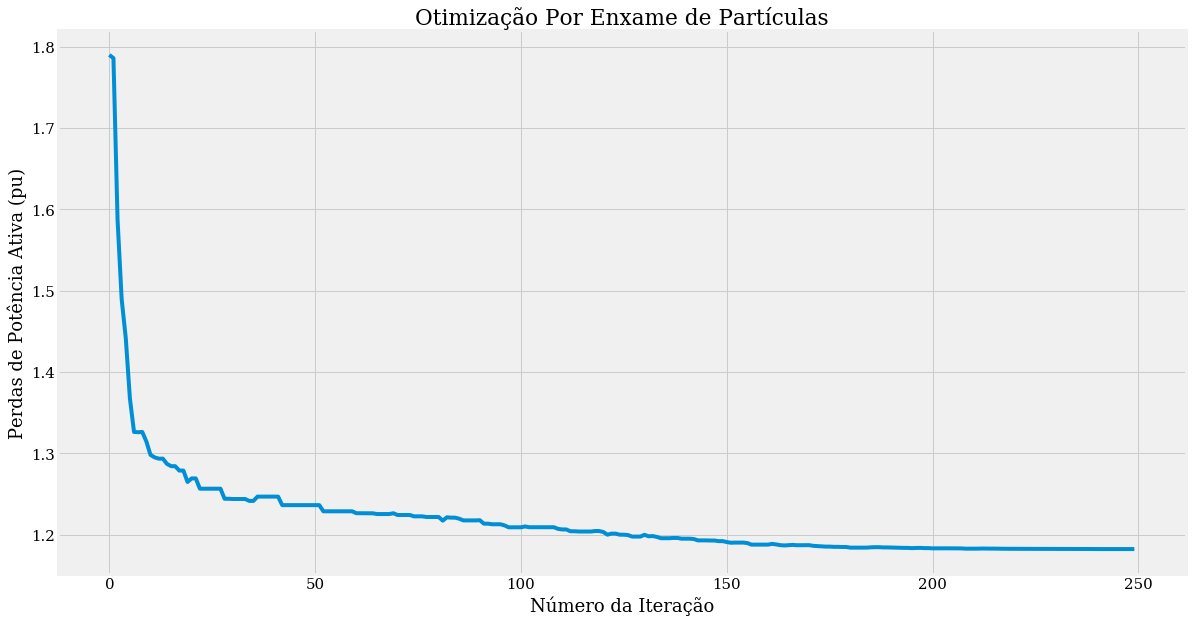

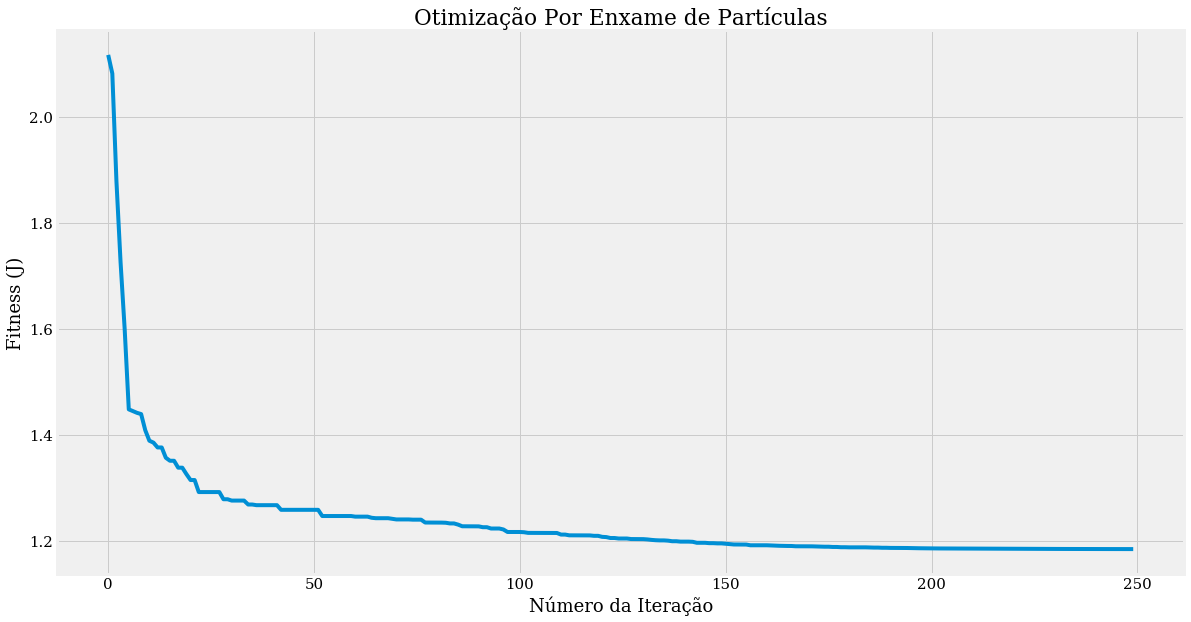

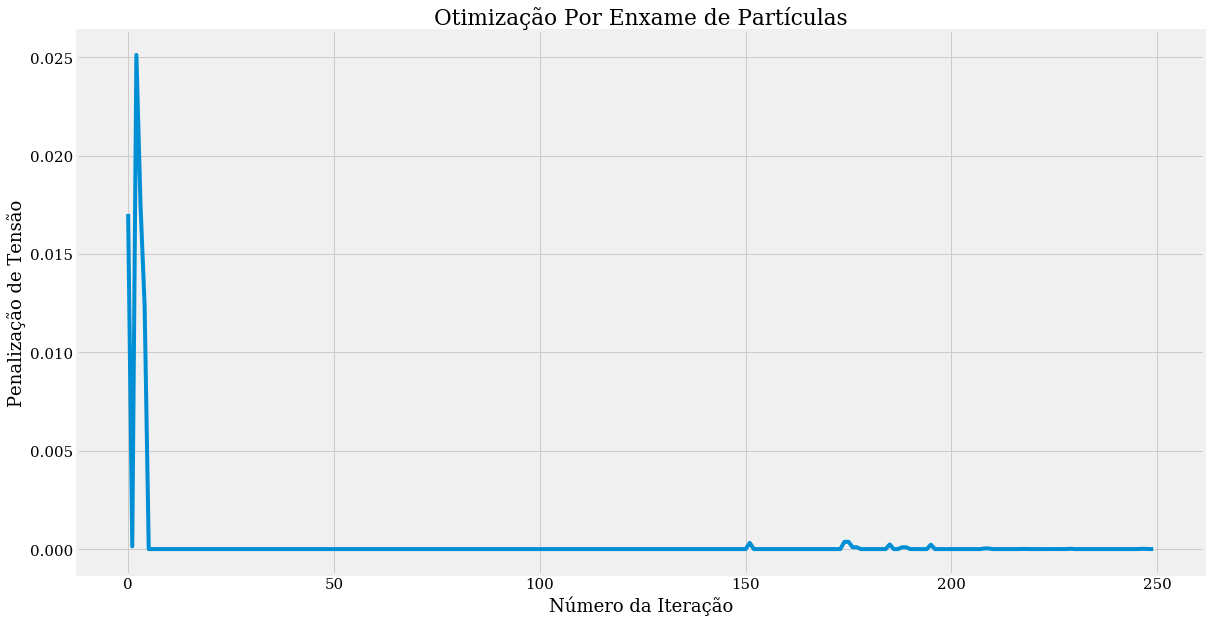

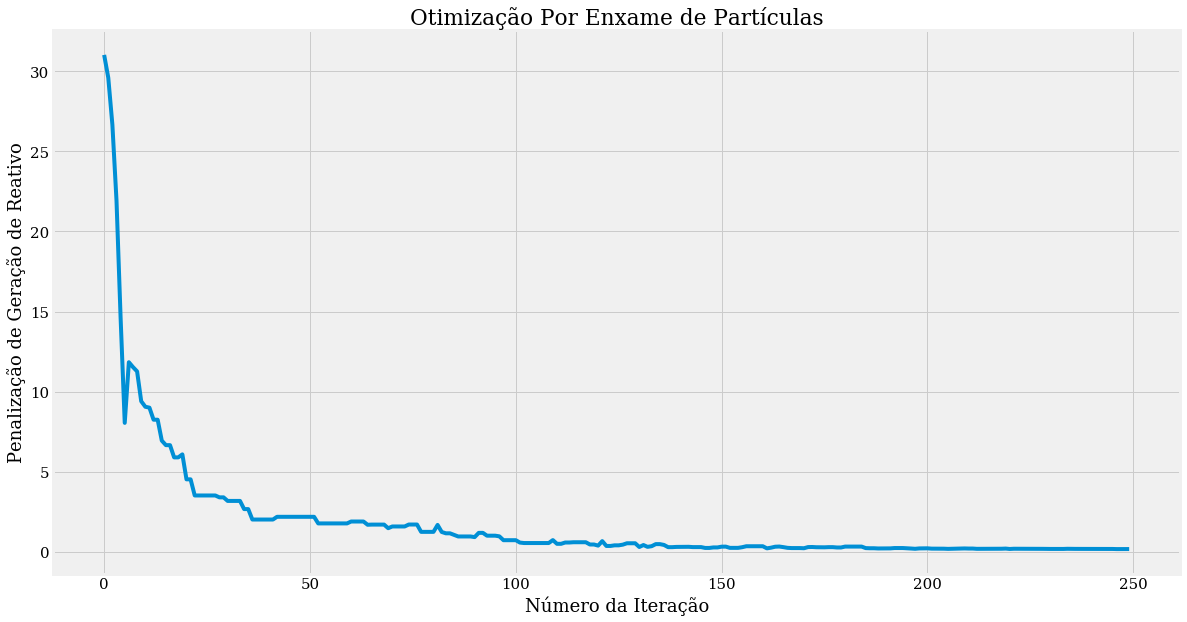

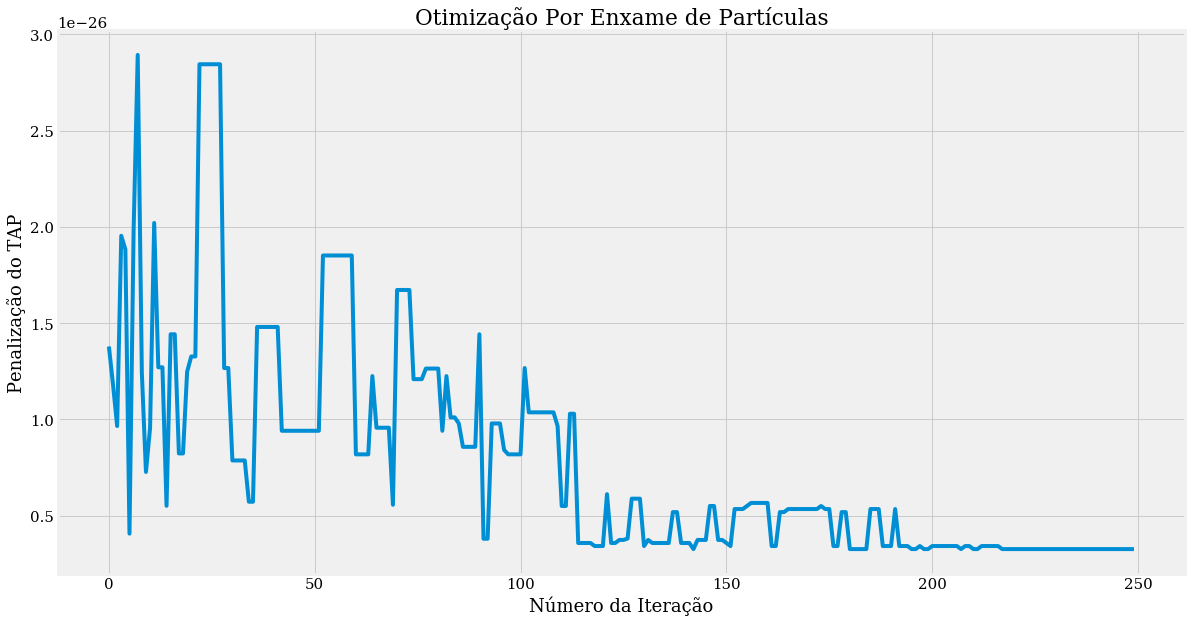

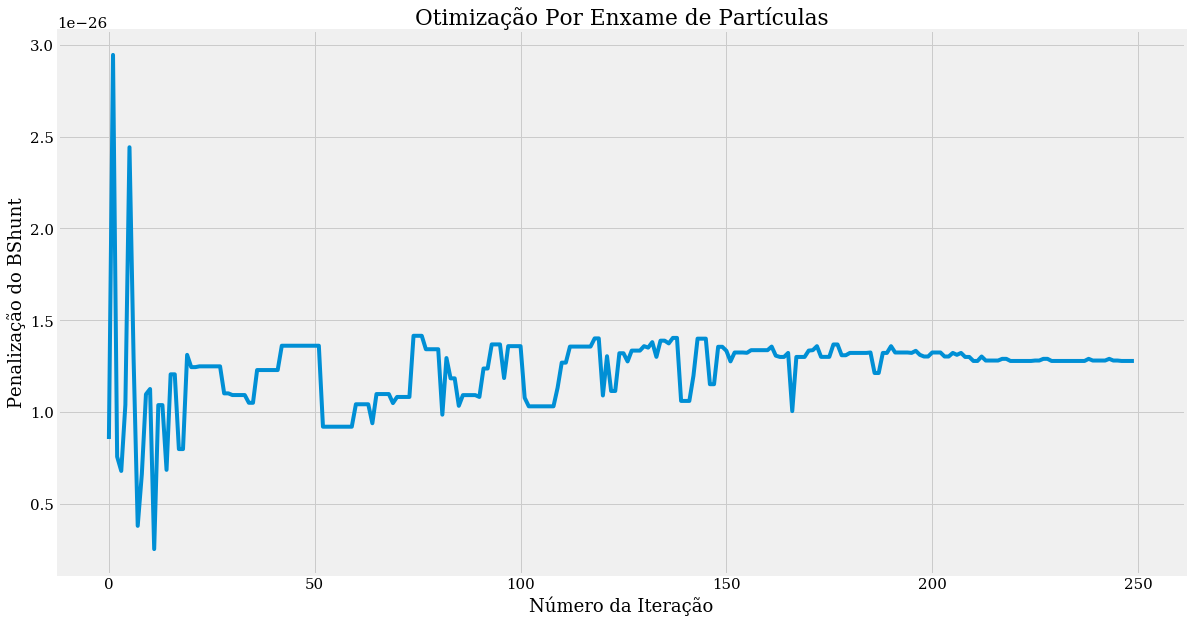

In [77]:
j,perdas_,pen_v,pen_gq,pen_tap,pen_bsh,global_best, tempo = otimizacao_clpso_discreto(sep118, pt=0.8, rgap =0, zeta=1, psi=0.01, sigma=0.01, omega=0.01, max_iter=250, n_particles=40,c1=1,c2=0,v_amp=0.1,valor_inicial=0,step=0.01, wmax=0.9,relatorio=True,inicial=False)

In [79]:
sep118.res_ext_grid

,p_mw,q_mvar
0,499.43267,43.855778


In [80]:
sep118.ext_grid

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,68,True,None,0,1.058355,805.2,0.0,300.0,-300.0
